In [27]:
import pandas as pd
import matplotlib.pyplot as plt

In [16]:
%pip install gym-anytrading


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: C:\Users\troym\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



  Using cached gym_anytrading-2.0.0-py3-none-any.whl.metadata (292 bytes)
   ---------------------------------------- 0.0/172.2 kB ? eta -:--:--
   -------------------------------------- - 163.8/172.2 kB 5.0 MB/s eta 0:00:01
   ---------------------------------------- 172.2/172.2 kB 2.1 MB/s eta 0:00:00


In [19]:
%pip install stable_baselines3


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: C:\Users\troym\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



   ---------------------------------------- 0.0/182.3 kB ? eta -:--:--
   ---------------------------------------- 182.3/182.3 kB 2.8 MB/s eta 0:00:00


In [21]:
import gymnasium as gym
import gym_anytrading

In [22]:
from stable_baselines3.common.vec_env import DummyVecEnv

In [23]:
from stable_baselines3 import A2C

In [24]:
AMZN_1 = pd.read_csv('data/AMZN.csv')
AMZN_1 = pd.DataFrame(AMZN_1)
AMZN_1 = AMZN_1.drop('Adj Close', axis=1)
AMZN_1.shape

(253, 6)

In [41]:
AMZN_1['Date'] = pd.to_datetime(AMZN_1['Date'])
AMZN_1.set_index('Date', inplace=True)

In [42]:
AMZN_1

,Open,High,Low,Close,Volume
Date,,,,,
2023-08-09,139.970001,140.320007,137.100006,137.850006,50017300
2023-08-10,139.070007,140.410004,137.490005,138.559998,58928400
2023-08-11,137.399994,139.330002,137.000000,138.410004,42832100
2023-08-14,138.300003,140.589996,137.750000,140.570007,47148700
2023-08-15,140.050003,141.279999,137.229996,137.669998,42781500
...,...,...,...,...,...
2024-08-05,154.210007,162.960007,151.610001,161.020004,83149400
2024-08-06,161.710007,165.080002,158.539993,161.929993,59950800
2024-08-07,166.550003,167.580002,161.429993,162.770004,48408200


In [54]:
env = gym.make('stocks-v0', df=AMZN_1, frame_bound=(10, 252), window_size=10)

info: {'total_reward': 28.05994415283203, 'total_profit': 0.4873566975842234, 'position': <Positions.Long: 1>}


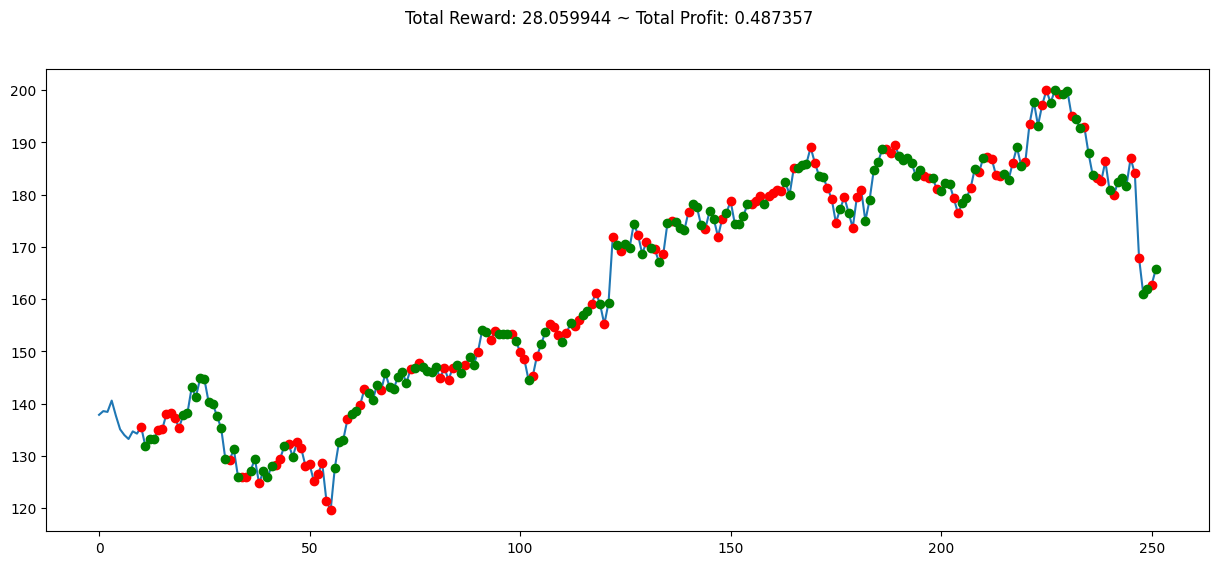

In [56]:
state = env.reset()
while True:
    action = env.action_space.sample()
    observation, reward, terminated, truncated, info = env.step(action)
    done = terminated or truncated

    # env.render()
    if done:
        print("info:", info)
        break

plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()

# Training

In [57]:
env_maker = lambda: gym.make('stocks-v0', df=AMZN_1, frame_bound=(10, 252), window_size=10)
env = DummyVecEnv([env_maker])

In [58]:
model = A2C('MlpPolicy', env, verbose=1)
model.learn(total_timesteps=10000)

Using cpu device
------------------------------------
| time/                 |          |
|    fps                | 399      |
|    iterations         | 100      |
|    time_elapsed       | 1        |
|    total_timesteps    | 500      |
| train/                |          |
|    entropy_loss       | -0.692   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 99       |
|    policy_loss        | -1.33    |
|    value_loss         | 3.36     |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 387      |
|    iterations         | 200      |
|    time_elapsed       | 2        |
|    total_timesteps    | 1000     |
| train/                |          |
|    entropy_loss       | -0.688   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 199      |
|    policy_loss        | 0.265    |
|    value_loss      

# Test

In [63]:
env = gym.make('stocks-v0', df=AMZN_1, frame_bound=(10, 252), window_size=10)
obs, _ = env.reset()

In [64]:
obs

array([[138.56    ,   0.709992],
       [138.41    ,  -0.149994],
       [140.57    ,   2.160003],
       [137.67    ,  -2.900009],
       [135.07    ,  -2.599991],
       [133.98    ,  -1.090011],
       [133.22    ,  -0.759995],
       [134.68    ,   1.459992],
       [134.25    ,  -0.429993],
       [135.52    ,   1.270004]], dtype=float32)

info: {'total_reward': 25.620079040527344, 'total_profit': 0.5311002475618295, 'position': <Positions.Long: 1>}


C:\Users\troym\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\gymnasium\core.py:311: UserWarning: WARN: env.render_all to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.render_all` for environment variables or `env.get_wrapper_attr('render_all')` that will search the reminding wrappers.
  logger.warn(


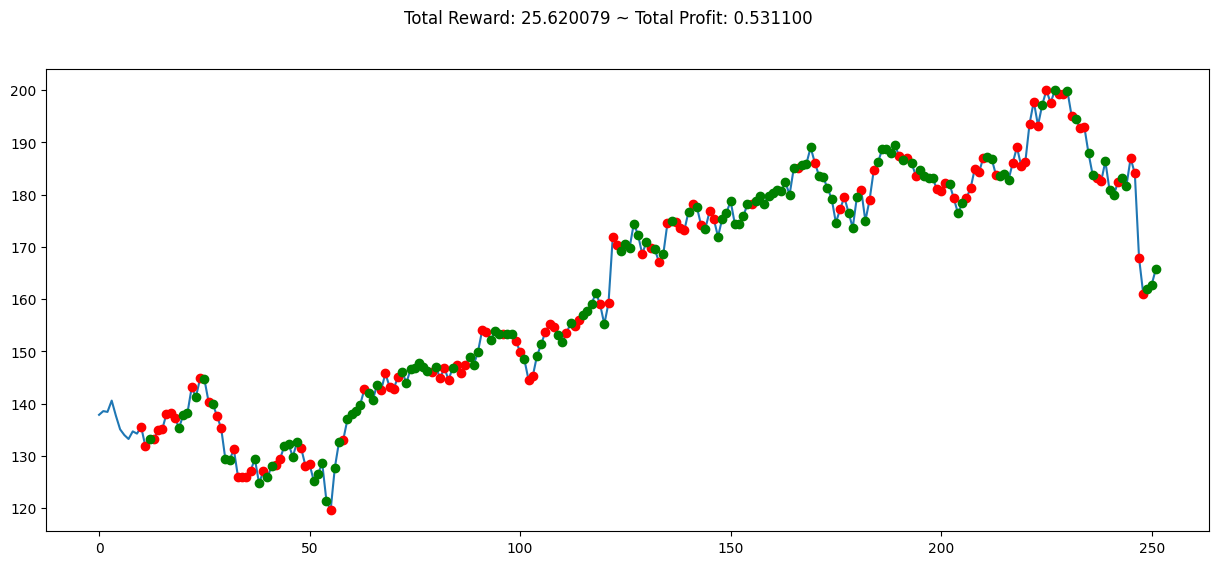

In [65]:
while True:
    action, _states = model.predict(obs)
    observation, reward, terminated, truncated, info = env.step(action)
    done = terminated or truncated 

    if done:
        print("info:", info)
        break

plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()